# Normal Distribution

## Introduction

The first formal model in these notes happened so fast, you might have missed it.  By assuming $X_n \sim_{iid} \text{Bernoulli}(p)$, we created a single model.  This one statistical model assumed the Bernoulli distribution.  Our data consisted of multiple independent observations from the identical distribution (iid), a Bernoulli distribution with unknown population parameter $p$.

In this section, we change the assumed distribution to the Normal distribution.  Because the support for the Normal distribution is all real numbers, this distribution applies to data that could potentially take on any value in the real line.  We complete the section by rehearsing our use of the likelihood function as it applies to Normal data.  When, out in the real world on your own, if don't know what model to apply, assume normality.  

## Warm Up

- **numeric**: a type of variable that represents numbers, meaningfully mathable values.  
For example, adult heights.
- **continuous random variable**: a random variable that can take on any value within a given range.  
For example, a random varible that measures time.
- **density plot**: a visualization of an approximation of the probability density function.
- **standardize**: a mathematical trick to make unitless a dataset.
- **standard normal distribution**: a instance of the normal distribution where the mean is $0$ and the standard deviationis $1$.
- **sampling distribution**: the name of the distribution of a statistic.
- **Central Limit Theorem**: a theorem that says the statistic the mean looks normal if the sample size is big enough.


## Density Plot

It's common to assume any single numerical variable data follows a Normal distribution, $ Y_n \sim \text{Normal}(\mu, \sigma)$ for $n = 1, 2, \ldots, N$.  Note that we will call this a formal model although I understand that it is difficult to separate the ideas of distribution and model at this point.  For now, let's push forward and begin as we ought to begin any analysis, plot the data.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal
import bplot as bp

bp.LaTeX()
bp.dpi(300)

Let's return to our dataset about the Order Carnivora.  Consider the variable `BW`, which records birth weight in grams.  These are numeric data and it's reasonable to assume the data came from a continuous random variable, because grams can theoretically take on any positive value in a reasonable range for birth weights from the Order Carnivora.  

Since our dataset has missing values, recorded as `NaN`s, let's first drop them.  Next we'll approximate the density function from which these data may have come from.  A density plot is an approximation, from the available data, of the probability density function itself.  A common alternative plot is a histogram.

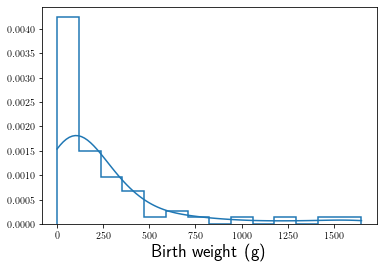

In [5]:
carnivora = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/carnivora.csv")
bw = carnivora['BW'].dropna()
bp.density(bw)
bp.histogram(bw)
bp.labels(x='Birth weight (g)', size=18)

The above plot tells us that the majority of our data consist of observations below $500$ grams with a few observations showing up sporadically above $500$.  How many observations are above $500$ is not immediately clear, so let's see if we can modify the plot above to help us visualize all of the data.

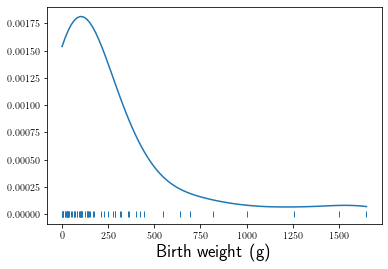

In [6]:
bw = carnivora['BW'].dropna()
bp.density(bw)
bp.rug(bw)
bp.labels(x='Birth weight (g)', size=18)

Using vectorization, try to produce code that counts the number of observations greater than $500$.  And then turn this into a proportion.  What does this proportion represent, in terms of a Bernoulli distribution?

## Properties of the Normal Distribution

If $Y \sim \text{Normal}(\mu, \sigma)$, then one can standardize the random variable $Y$ by subtracting off the mean $\mu$ and scaling by the standard deviation $\sigma$,

$$ Z = \frac{Y - \mu}{\sigma} \sim \text{Normal}(0, 1). $$

This linear transformation of a random variable that follows a normal distribution is so common, that the random variable $Z$ has a special name.  A random variable that follows the $\text{Normal}(0, 1)$ distribution is called standard Normal; $Z$ follows a standard Normal distribution with mean $\mu = 0$ and variance $\sigma = 1$.

The probability density function of the $\text{Normal}(\mu, \sigma)$ distribution is

$$ \text{normal}(x | \mu, \sigma) = (2\pi\sigma^2)^{-1/2} \exp{\left( \frac{-(x - \mu)^2}{2\sigma^2} \right) }. $$

A plot of the standard Normal probability density function is displayed below.  Try to change the code to help you better understand that the $\text{Normal}(\mu, \sigma)$ distribution indexes an uncountable number of distributions via $\mu$ and $\sigma$.  For each specific choice of $(\mu, \sigma)$, think of it as an instantiation of a new random variable.

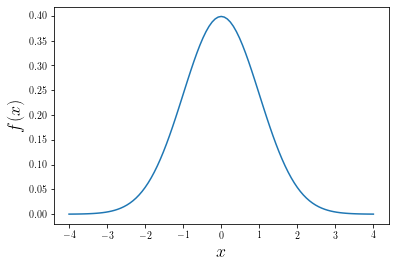

In [7]:
x = np.linspace(-4, 4, 101)
mu = 0; sigma = 1;
fx = normal.pdf(x, loc=mu, scale=sigma)
bp.curve(x, fx)
bp.labels(x='$x$', y='$f(x)$', size=18)

## Likelihood

### Example

To estimate the population mean birth weight of animals from the Order Carnivora $\mu$, we'll assume a Normal distribution, $Y_n \sim_{iid} \text{Normal}(\mu, \sigma)$.  Find the MLE of $\mu$ and then $\sigma$ by hand.

### Example

Find the MLE of $(\mu, \sigma)$ using a computer.

## Assumed Normality

Notice from the plot above of birth weights from the Order Carnivora, the data don't obviously come from a Normal distribution, and yet we modeled these data with a Normal distribution.  Such an assumption doesn't offend nearly any statistician, and yet it's almost offensive that no statistician is bothered by this.  In this subsection, we'll explore why statisticians are often happy to assume normality.

Statisticians are not often bothered by assuming Normal data, because they are trained to not think about data statically.  The randomness of data, despite the data appearing to be fixed quantities, comes from imagining that the process that produced these data could be repeated (even if it can't).  In the case of a random sample of animals from the Order Carnivora, this would mean that you could (but wouldn't) randomly sample a new set of data from the same population of animals from the Order Carnivora.

Recall that earlier in these notes, we already saw this idea.  Our operational definition of probability is the limitting relative frequency of repeating the process an infinite number of times.  We are now expanding on this idea to imagine that an entire new dataset comes from each iteration.

Statisticians recognize that collecting new data is unlikely to happen, but based on our operational definition of probability, this theoretical resampling is just the natural, logical extension.  Since each new dataset comes from the same population, we'd assume the Normal distribution for each new dataset.  Based on the model $Y_n \sim \text{Normal}(\mu, \sigma)$, the likelihood dictates that we use the sample mean to estimate $\mu$.  The punchline to all of this is that statisticians can prove mathematically the shape of the multiple estimates of $\mu$ that would come about based on this infinite resampling.

Just like we can use a computer to approximate the probability a coin flip turning up heads to be $1/2$, we can simulate the shape of multiple esimates of $\mu$ from a population of animals from the Order Carnivora.  Let's look at the code and a plot, and then I'll explain what's going on.

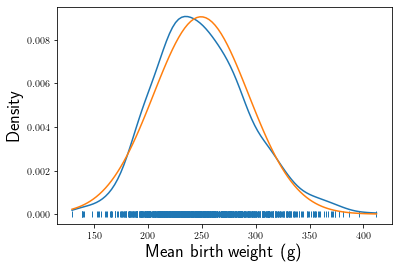

In [10]:
N = bw.size
R = 1001
mus = np.full((1001, ), np.nan)

seed = np.random.seed(1234)
for r in range(R):
    idx = np.random.choice(bw._index, N)
    mus[r] = bw[idx].mean()
    
bp.density(mus)
bp.rug(mus)

x = np.linspace(np.min(mus), np.max(mus), 101)
fx = normal.pdf(x, loc=bw.mean(), scale=bw.std()/np.sqrt(N))

bp.curve(x, fx, color='tab:orange')
bp.labels(x='Mean birth weight (g)', y='Density', size=18)

Let's explain the code above in English, before we dive into the details of what just happened statistcally.  We are interested in birth weights from animals of the Order Carnivora, but we are not interested in missing values, encoded as `NaN`s in Python.  We use the library `pandas` to select only specific variables we are currently interested in, namely `BW`, and then drop the `NaN`s.

The next paragraph (if you will) of code, stores the sample size and the number of resamples to take.  The number of resamples is analogous to how many coin flips you want to simulate.  In this case, `R` is specifically how many new data sets you want to simulate.  Next, we preallocate a chunk of memory to hold our `R` estimates of $\mu$.  Preallocation should be necessary in statically typed languages and remains an incredibly good idea in any language that allows it.

The for loop iterates `R` times.  In each iteration, we randomly sample integers that correspond the index of specific observations in our vector of data, recognizing that the variable `bw` came from the dataframe `carnivora`.  Sampling by index seems like a pain right now, but it is more memory efficient and we'll learn in the future that is the more robust solution.  Each loop creates a new vector of indices `idx`, that we use to index our original vector of data and then calculate the sample mean.  By the end of the for loop, we have `R` estimates of $\mu$.

The plot displays a density plot of the multiple estimates of $\mu$.  This density plot (in blue) graphically represents an estimate of the sampling distribution of the sample mean.  The sampling distribution of an estimator is the theoretical distribution for the collection of statistics one would obtain if they infinitely resampled from the population of interest.  In the scenario above, we resampled and calculated the statistic the sample mean.  Because we resampled only `R` times, this is an approximation of the sampling distribution for the sample mean.

Pay particular attention to the fact that our original data is not Normal, but the collection of multiple estimates of $\mu$ are in fact nearly Normal.  This phenomenon, named the Central Limit Theorem is a classic result of mathematical statistics.  For an arbitrary population distribution with finite variance, the sampling distribution for the sample mean will be approximately $\text{Normal}(\mu, \sigma^2/N)$.  Notice the square root of the sample size in the denominator of the standard deviation.  This says that as the sample size tends to infinity, the standard deviation of the sampling distribution will collapse on the true population mean $\mu$; when you collect all the individuals from the population mean, you will know the population mean, no more estimating.  The plot above also contains the Central Limit Theorem approximation (in orange) to the sampling distribution of the sample mean.

## Sampling Distributions

Recall that a statistic is any function calculated from a set of random variables (data).  By applying the logic above, all statistics have sampling distributions.  These sampling distributions come about by imagining infinitely resampling from the same population and calculating the same statistic on each new sample.  

It takes about a semester to accept this fact.  You need to keep in mind that each statistic, calculated from what you once thought was a static dataset, is now to be thought of as a single random variable.  Each statistic is a function applied to random variables.  Because the arguments to the function are random variables, the output of the function, the statistic, is a random variable.  Since random variables follow distributions, the statistic follows a distribution.  The name of this distribution is the sampling distribution.

Even after you accept that every statistic should be thought of as a random variable, it still doesn't quite help you imagine the sampling distribution for that statistic.  It's hard to imagine sampling distributions for statistics, because we don't know their shape.  We don't know their shape and yet we know they exist, so they are given a general name, the sampling distribution.  The key points that you should keep in mind are that sampling distributions

1. exist,
2. are different for each statistic, and
3. are easiest to remember when you've grasped how they come about; data are not static.

## Central Limit Theorem

A more formal definition of the Central Limit Theorem goes like this.  Assume $X_n \sim_{iid} F(\theta)$ for $n = 1, \ldots, N$ where $\mathbb{E}(X) = \mu$ and $\mathbb{V}(X) = \sigma^2 < \infty$.  Let $\hat{\mu}$ denote the sample mean.  Then

$$ \hat{\mu}\stackrel{\cdot}{\sim} \text{Normal}\left(\mu, \frac{\sigma}{\sqrt{N}} \right). $$

In English, we'd read the sampling distribution of the sample mean approaches a normal distribution with mean $\mu$ and standard deviation $\mathbb{D}(X)/\sqrt{N}$ as the sample size increases, so long as the population from which the independent data were sampled has finite variance.

There are a few important facts about the Central Limit Theorem above.  As stated above, the Central Limit Theorem

1. depends on unknown population parameters, $\mu$ and $\sigma$,
2. is an approximation of the sampling distribution of the sample mean that depends on the sample size $N$, and
3. doesn't tell us about other statistics than the sample mean.

Notice that I didn't claim that the finiteness of the variance of the population as an important fact.  This assumption is generally a reasonable assumption that most applied statisticians are willing to accept.

In most introductory statistics courses, the majority of the course material is based around the Central Limit Theorem.  The Central Limit Theorem is a mathematical theorem, with it's own assumptions, but by focusing on it, a course is making assumptions about the student's future use of statistics.  Using only statistics that follow the CLT limits students application of statistics.  On the other hand, statisticians maintain their jobs by showing that statistics other than the sample mean follow the Central Limit Theorem, and there's been no shortage of papers on this topic.